In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def classification_metrics(target, pred):
    tn, fp, fn, tp = metrics.confusion_matrix(target, pred).ravel()
    acc = (tn + tp) / (tn + fp +fn + tp)
    sen = tp / (tp + fn)
    spc = tn / (tn + fp)
    prc = tp / (tp + fp)
    return acc, sen, spc, prc

In [3]:
data = load_breast_cancer()
X, y = data['data'], data['target']

In [4]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

In [6]:
n_repeat = 100
result_df = pd.DataFrame(columns=['acc', 'sen', 'spc', 'prc'])

for i in range(n_repeat):
    
    # Split train and test data
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)
    
    # Train the model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    # Test the model
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    acc, sen, spc, prc = classification_metrics(y_test, y_pred)

    # Add to the dataframe
    result_df.loc[len(result_df)] = [acc, sen, spc, prc]

In [7]:
result_df

,acc,sen,spc,prc
0,0.964912,0.973333,0.948718,0.973333
1,0.964912,0.961538,0.972222,0.986842
2,0.956140,0.958904,0.951220,0.972222
3,0.964912,0.985915,0.930233,0.958904
4,0.956140,0.960000,0.948718,0.972973
...,...,...,...,...
95,0.991228,0.985714,1.000000,1.000000
96,0.991228,0.985915,1.000000,1.000000
97,0.973684,1.000000,0.923077,0.961538
98,0.973684,0.986111,0.952381,0.972603


In [8]:
result_df.mean()

acc    0.961930
sen    0.972954
spc    0.942531
prc    0.967302
dtype: float64

In [9]:
result_df.std()

acc    0.018918
sen    0.018940
spc    0.039464
prc    0.021741
dtype: float64

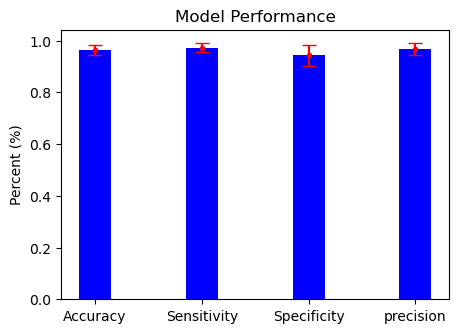

In [10]:
x = np.array(["Accuracy", "Sensitivity", "Specificity", "precision"])
y = np.array(result_df.mean())
s = np.array(result_df.std())

fig, ax = plt.subplots(figsize=(5, 3.5)) 
plt.bar(x, y, width = 0.3, color = 'b')
ax.errorbar(x, y, yerr=s, fmt='.', color='r', capsize=5)

plt.ylabel("Percent (%)")
plt.title("Model Performance")
plt.show()

In [15]:
model.feature_importances_

array([0.03266286, 0.01092982, 0.04821889, 0.03826272, 0.00570795,
       0.00929089, 0.02385985, 0.14575993, 0.00547998, 0.00367089,
       0.01316431, 0.00419759, 0.01250009, 0.01666416, 0.00462379,
       0.00558043, 0.00560764, 0.00338934, 0.00306672, 0.00542362,
       0.12007685, 0.016483  , 0.13685259, 0.13626711, 0.01613413,
       0.00969779, 0.03080617, 0.11403637, 0.01742524, 0.00415928])